In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
%matplotlib inline

In [2]:
# load the properties data
properties = pd.read_csv('C:/Users/silvi/Box Sync/Courses/498/project_files/properties_2016.csv', low_memory=False)

In [3]:
properties.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [4]:
dtype_df = properties.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df

,Count,Column Type
0,parcelid,int64
1,airconditioningtypeid,float64
2,architecturalstyletypeid,float64
3,basementsqft,float64
4,bathroomcnt,float64
5,bedroomcnt,float64
6,buildingclasstypeid,float64
7,buildingqualitytypeid,float64
8,calculatedbathnbr,float64
9,decktypeid,float64


In [5]:
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,1
1,float64,52
2,object,5


In [6]:
# Linear Variable Combinations
properties['property_age'] = 2018 - properties['yearbuilt']+1
properties['total_rooms'] = properties['calculatedbathnbr'] + properties['bedroomcnt']
properties['garage_yn'] = np.where((properties['garagecarcnt'] > 0) | (properties['garagetotalsqft'] > 0),1,0)
properties['prop_to_land'] = properties['structuretaxvaluedollarcnt']/properties['landtaxvaluedollarcnt']
properties['length_tax_delinq'] = 2018 - properties['taxdelinquencyyear']
properties['coords'] = properties['latitude']/(10^6) + properties['longitude']/(10^6)
zip_count = properties['regionidzip'].value_counts().to_dict()
properties['zip_counts'] = properties['regionidzip'].map(zip_count)
city_count = properties['regionidcity'].value_counts().to_dict()
properties['city_counts'] = properties['regionidcity'].map(city_count)
county_count = properties['regionidcounty'].value_counts().to_dict()
properties['county_counts'] = properties['regionidcounty'].map(county_count)
properties['ac_yn'] = (properties['airconditioningtypeid']!=5)*1
properties['heat_yn'] = (properties['heatingorsystemtypeid']!=13)*1
properties['property_type'] = properties.propertylandusetypeid.replace({31 : "Mixed", 46 : "Other", 47 : "Mixed",
      246 : "Mixed", 247 : "Mixed", 248 : "Mixed",
      260 : "Home", 261 : "Home", 262 : "Home",
      263 : "Home", 264 : "Home", 265 : "Home",
      266 : "Home", 267 : "Home", 268 : "Home",
      269 : "Not Built", 270 : "Home", 271 : "Home",
      273 : "Home", 274 : "Other", 275 : "Home",
      276 : "Home", 279 : "Home", 290 : "Not Built",
      291 : "Not Built" }) 
properties['tax_total_10k'] = properties['taxvaluedollarcnt']/10000

In [7]:
properties.rename(index=str,columns={
"parcelid" : "id_parcel",
"yearbuilt" : "build_year",
"basementsqft" : "area_basement",
"yardbuildingsqft17" : "area_patio",
"yardbuildingsqft26" : "area_shed",
"poolsizesum" : "area_pool",
"lotsizesquarefeet" : "lot_size",
"garagetotalsqft" : "area_garage",
"finishedfloor1squarefeet" : "area_firstfloor_finished",
"calculatedfinishedsquarefeet" : "area_total_calc",
"finishedsquarefeet6" : "area_base",
"finishedsquarefeet12" : "area_finished_living",
"finishedsquarefeet13" : "area_perimeter",
"finishedsquarefeet15" : "area_total_finished",
"finishedsquarefeet50" : "area_other",
"unitcnt" : "unit_count",
"numberofstories" : "number_of_stories",
"roomcnt" : "room_count",
"bathroomcnt" : "bath_count",
"bedroomcnt" : "bedroom_count",
"calculatedbathnbr" : "bath_count_calc",
"fullbathcnt" : "bath_full_count",
"threequarterbathnbr" : "bath_3qtrs_count",
"fireplacecnt" : "fireplace_count",
"poolcnt" : "pool_count",
"garagecarcnt" : "garage_stalls_count",
"regionidcounty" : "region_county",
"regionidcity" : "region_city",
"regionidzip" : "region_zip",
"regionidneighborhood" : "region_neighbor",
"taxvaluedollarcnt" : "tax_total",
"structuretaxvaluedollarcnt" : "tax_building",
"landtaxvaluedollarcnt" : "tax_land",
"taxamount" : "tax_property",
"assessmentyear" : "tax_year",
"taxdelinquencyflag" : "tax_delinquency",
"taxdelinquencyyear" : "tax_delinquency_year",
"propertyzoningdesc" : "zoning_property",
"propertylandusetypeid" : "zoning_land_use",
"propertycountylandusecode" : "zoning_land_use_county",
"fireplaceflag" : "fireplace",
"hashottuborspa" : "tub",
"buildingqualitytypeid" : "bldg_quality",
"buildingclasstypeid" : "bldg_framing",
"typeconstructiontypeid" : "bldg_material",
"decktypeid" : "deck_type",
"storytypeid" : "story_type",
"heatingorsystemtypeid" : "heating",
"airconditioningtypeid" : "airconditioning",
"architecturalstyletypeid" : "architectural_style"
},inplace=True)

In [8]:
# Summary statistics for target variable
min  = properties['tax_total'].min()
max  = properties['tax_total'].max()
mean = properties['tax_total'].mean()
med  = properties['tax_total'].quantile(0.5)
p1   = properties['tax_total'].quantile(0.01)
p99  = properties['tax_total'].quantile(0.99)
print('min=', min, 
      'max=', max, 
      'mean=', mean, 
      'median=', med, 
      'p1=', p1, 
      'p99=', p99)

min= 1.0 max= 282786000.0 mean= 420478.99067852396 median= 306086.0 p1= 25443.0 p99= 2330146.34


In [9]:
# Trim top and bottom 1% of values
properties['log_tax_total'] = np.log(properties['tax_total'])
high = np.percentile((properties['log_tax_total'].dropna()),99)
low  = np.percentile((properties['log_tax_total'].dropna()),1)
properties2 = properties[(properties['log_tax_total'] > low) & (properties['log_tax_total'] < high)]

Text(500000,120000,'Average Home Value: $420K')

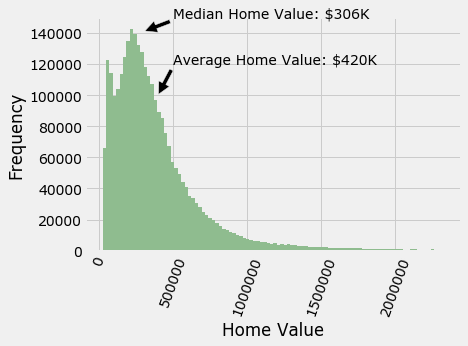

In [10]:
# Target variable distribution chart
plt.rcParams['font.family'] = "Verdana"
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots()
plt.hist((properties2['tax_total']),bins=100, color='darkseagreen')
plt.ylabel('Frequency')
plt.xlabel('Home Value')
plt.xticks(rotation = 70)
ax.annotate('Median Home Value: $306K', xy=(305000,141000), xytext=(500000,150000),
            arrowprops=dict(facecolor='black', shrink=0.03),
            )
ax.annotate('Average Home Value: $420K', xy=(400000,100000), xytext=(500000,120000),
            arrowprops=dict(facecolor='black', shrink=0.03),
            )

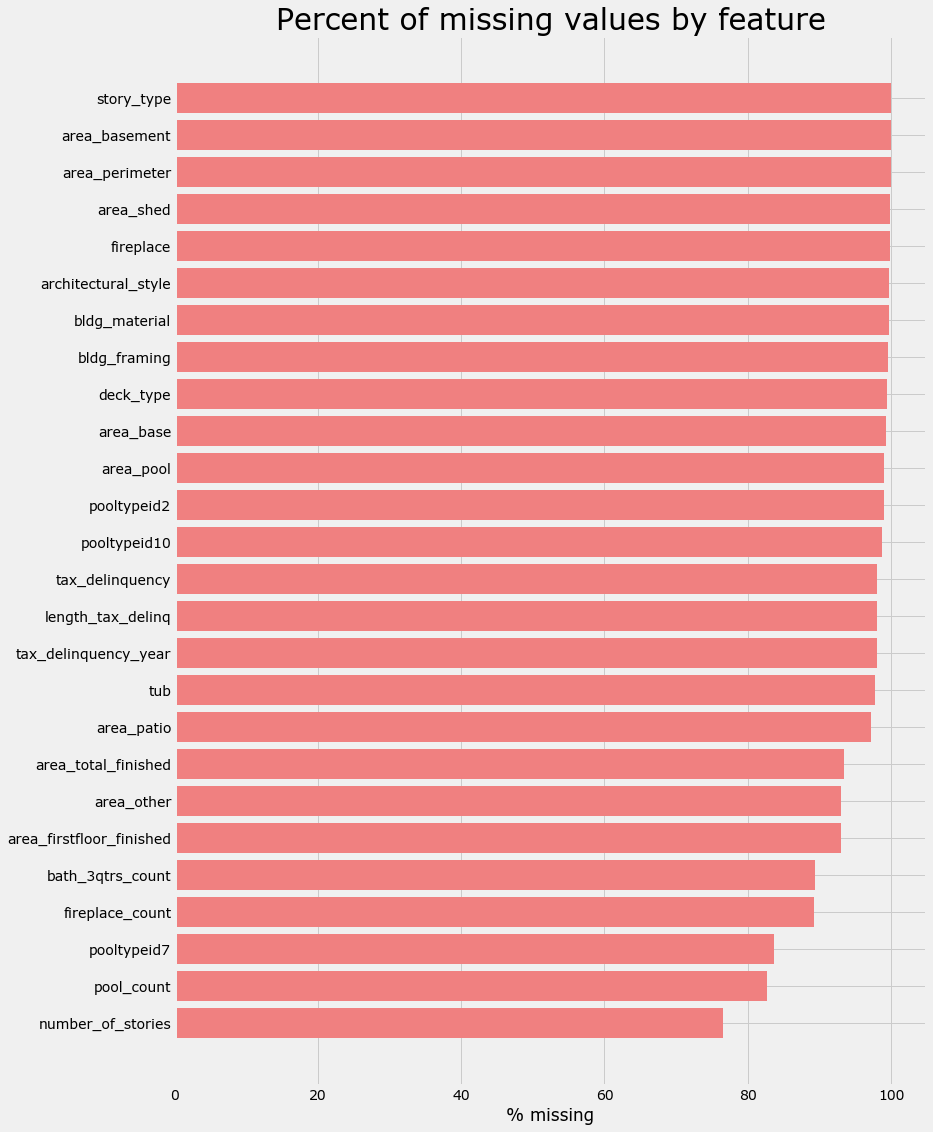

In [11]:
# Missing
columns = properties2.columns
percent_missing = properties2.isnull().sum() * 100 / len(properties2)
missing_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})
missing_df.sort_values('percent_missing', inplace=True)

missing_df2=missing_df[missing_df['percent_missing']>75]
ind = np.arange(missing_df2.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df2.percent_missing.values, color='lightcoral')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df2.column_name.values, rotation='horizontal')
ax.set_xlabel("% missing")
ax.set_title("Percent of missing values by feature", fontsize=30)
plt.show()

In [12]:
# Top features correlleated with target variable
topcor = pd.DataFrame()
topcor = properties2.drop(['tax_property', 'tax_land','tax_building', 'log_tax_total', 'tax_total_10k'], axis=1).corr()['tax_total'].sort_values(ascending=False).reset_index()
topcor.columns = ["feature", 'corr_coef']
topcor['abs_corr']=topcor['corr_coef'].abs()
topcor.sort_values(by=['abs_corr'], ascending=False, inplace=True)
topcor

,feature,corr_coef,abs_corr
0,tax_total,1.000000,1.000000
1,area_finished_living,0.592628,0.592628
2,area_firstfloor_finished,0.497405,0.497405
3,area_other,0.495326,0.495326
4,bath_count_calc,0.484806,0.484806
5,bath_full_count,0.463764,0.463764
6,bath_count,0.450147,0.450147
7,area_total_calc,0.434307,0.434307
8,total_rooms,0.398078,0.398078
9,fireplace_count,0.397581,0.397581


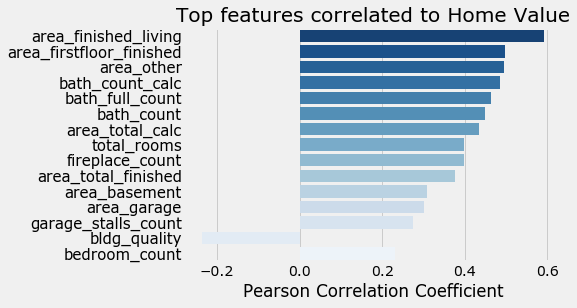

In [13]:
top15cor = topcor[1:16].reset_index()
plt.style.use('fivethirtyeight')
sns.barplot(x=top15cor['corr_coef'],y=top15cor['feature'],palette='Blues_r')
plt.title('Top features correlated to Home Value')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('')
plt.yticks(fontsize=15)
plt.show()

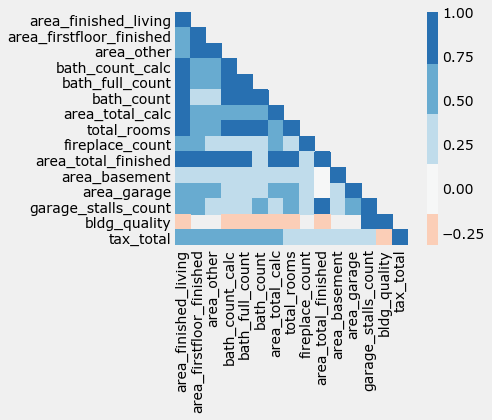

In [14]:
features=['area_finished_living','area_firstfloor_finished','area_other','bath_count_calc','bath_full_count',
          'bath_count','area_total_calc','total_rooms','fireplace_count','area_total_finished','area_basement','area_garage',
          'garage_stalls_count','bldg_quality','tax_total']
corrMatt = properties2[features].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrMatt, mask=mask, square=True, cmap=sns.color_palette("RdBu", 7),center=0)
plt.show()

In [ ]:
plt.rcParams['font.family'] = "Verdana"
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots()
plt.hist(properties2['total_rooms'], bins=np.arange(properties2['total_rooms'].min(), properties2['total_rooms'].max()+1))
plt.show()